# **Weather data outlier detection**

In [2]:
import pandas as pd               #Өгөгдөлтэй ажиллах функц
import seaborn as sns             #Өгөгдлийг дүрсэлж гаргах функц
import matplotlib.pyplot as plt   #Өгөгдлийг дүрсэлж гаргах функц
import numpy as np                #Тоон өгөгдөлтэй ажиллах функц

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
humid = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21h.csv')
press = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21p.csv')
tempr = pd.read_csv('/home/barkowich/Documents/anaconda/ml/weather/21t.csv')

In [4]:
merged = humid
merged = merged.join(press, lsuffix="_left")          #тус бүрийн багануудыг нэгтгэнэ
merged = merged.join(tempr, lsuffix="_left" )
merged.shape                                          #Өгөгдлийн хэлбэр хэмжээг үзүүлнэ

(192718, 3)

In [5]:
merged.columns = ["Humidity", "Pressure", "Temperature"]      #Баганы нэрийг солих үйлдэл
merged.head()

,Humidity,Pressure,Temperature
0,0.742,1037.400000,-33.0
1,0.742,1037.033333,-33.0
2,0.668,1036.666667,-34.0
3,0.742,1036.300000,-33.0
4,0.673,1035.933333,-32.0


In [6]:
df = pd.DataFrame()
df['Timestamp'] = pd.DataFrame(pd.date_range(start="2010-01-01", end="2020-12-31", freq='30T'))
merged = merged.join(df, how = 'left')
merged.head()

,Humidity,Pressure,Temperature,Timestamp
0,0.742,1037.400000,-33.0,2010-01-01 00:00:00
1,0.742,1037.033333,-33.0,2010-01-01 00:30:00
2,0.668,1036.666667,-34.0,2010-01-01 01:00:00
3,0.742,1036.300000,-33.0,2010-01-01 01:30:00
4,0.673,1035.933333,-32.0,2010-01-01 02:00:00


## **Plotting datasets**

In [7]:
# Data Plot  
    
def plotvariable(df, variable):
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(df[variable],alpha=0.5)

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    plt.show()

In [8]:
from scipy.stats import norm
def plot_bell(data,name_xlabel):
  plt.hist(data, bins=20, rwidth=0.8, density=True)
  plt.xlabel(name_xlabel)
  plt.ylabel('Count')

  rng = np.arange(data.min(), data.max(), 0.1)
  plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))

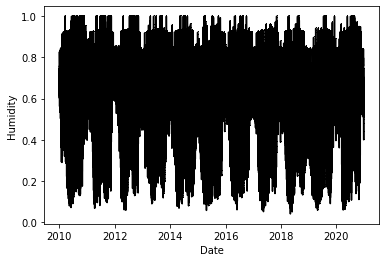

In [9]:
plt.plot(merged['Timestamp'], merged['Humidity'], color='black', marker=',')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


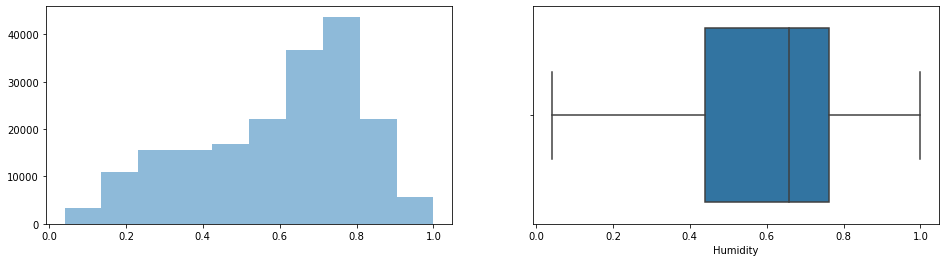

In [10]:
plotvariable(merged,'Humidity')

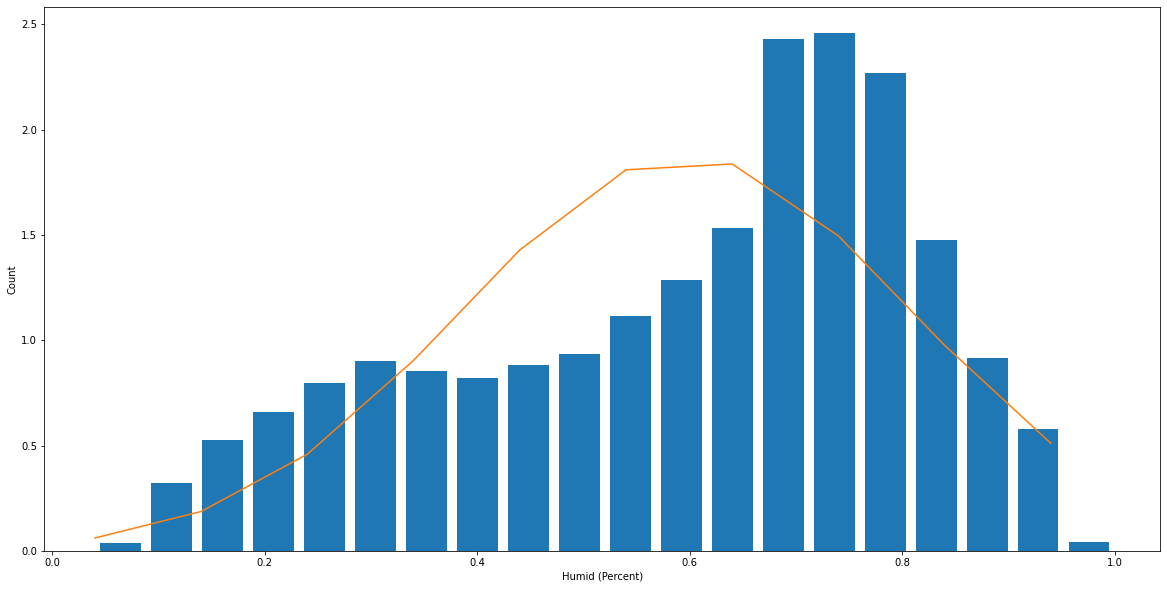

In [11]:
plot_bell(merged.Humidity, 'Humid (Percent)')

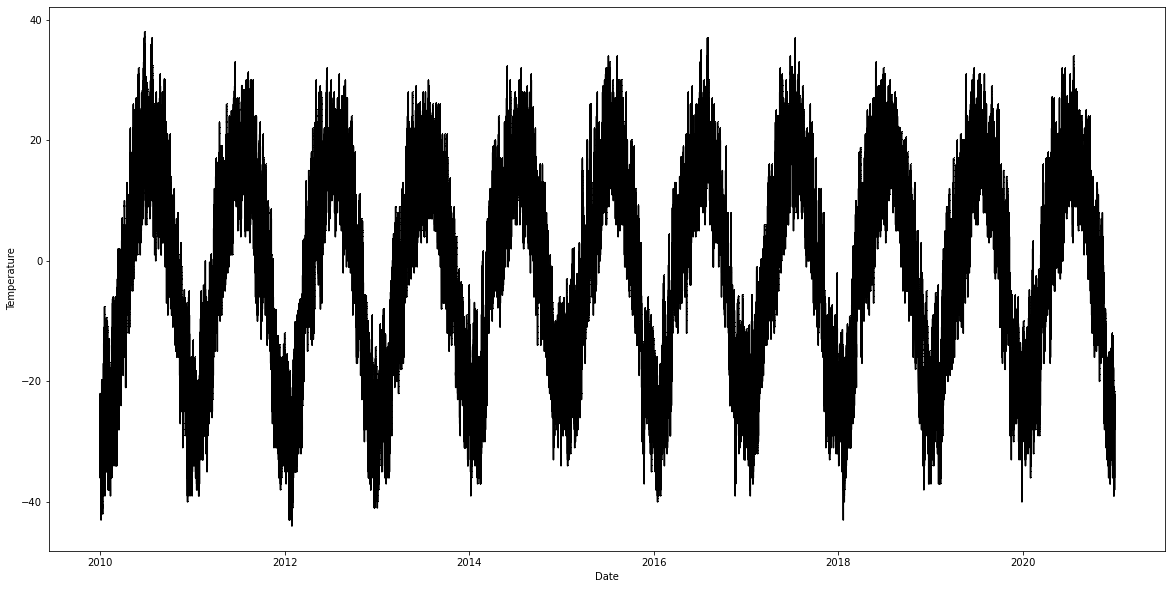

In [12]:
plt.plot(merged['Timestamp'], merged['Temperature'], color='black', marker=',')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


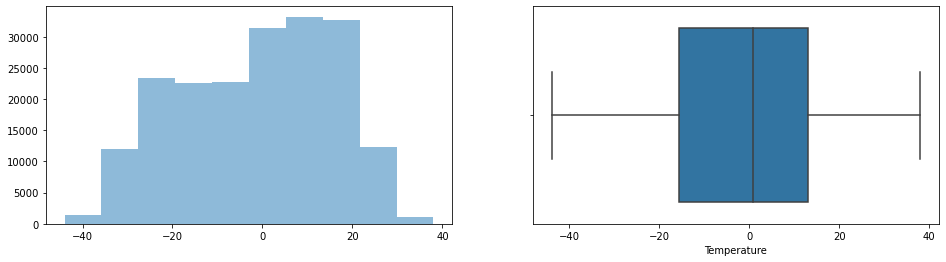

In [13]:
plotvariable(merged,'Temperature')

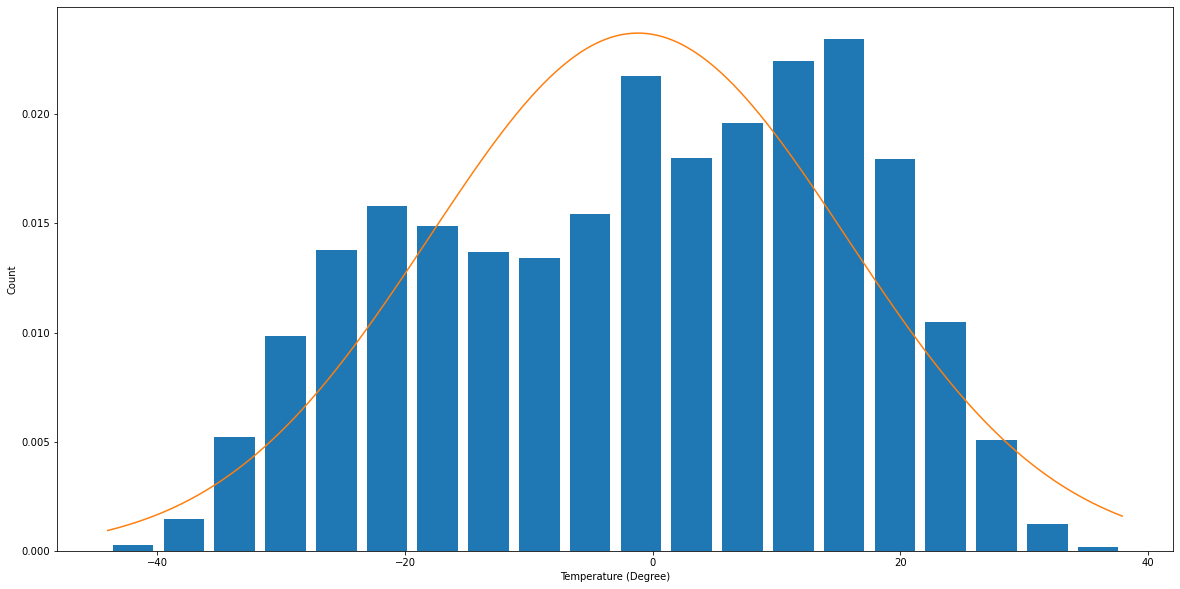

In [14]:
plot_bell(merged.Temperature, 'Temperature (Degree)')

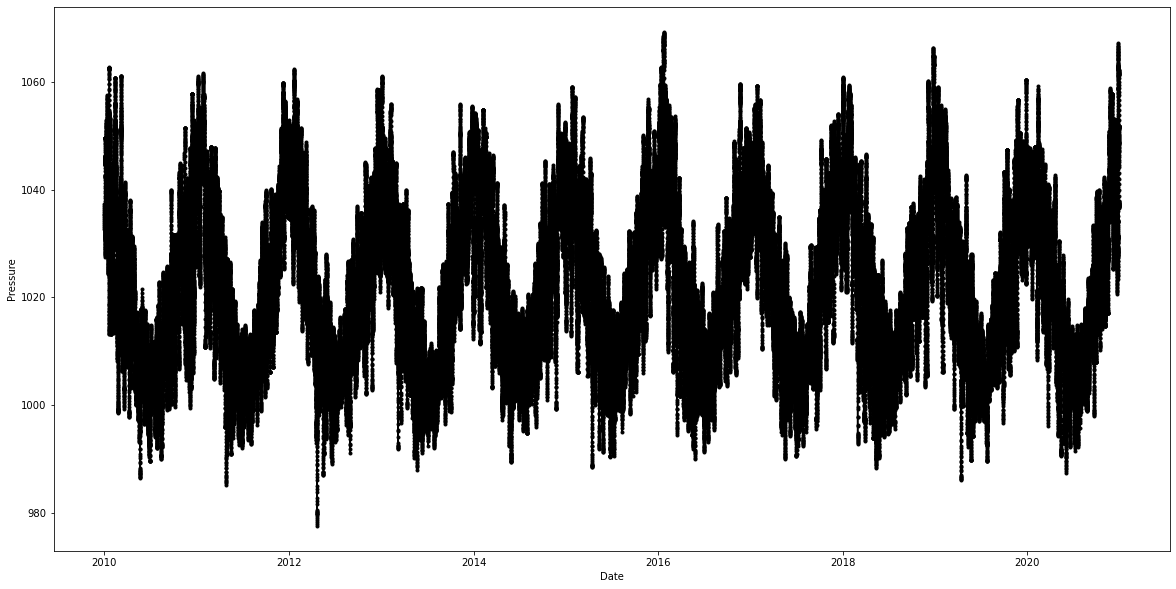

In [15]:
plt.plot(merged['Timestamp'], merged['Pressure'], color='black', marker='.')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

/home/barkowich/anaconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


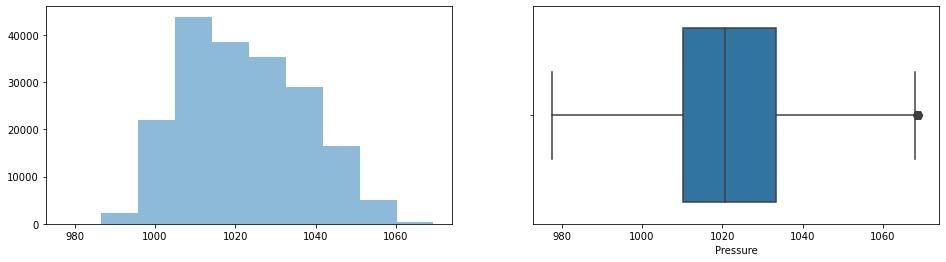

In [16]:
plotvariable(merged,'Pressure')

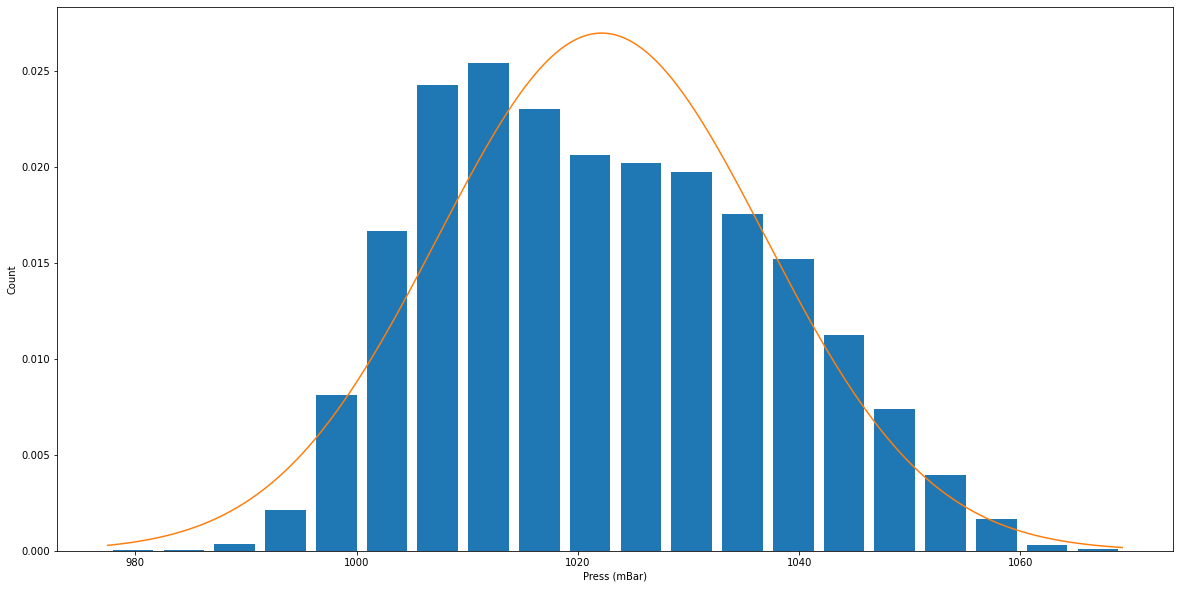

In [17]:
plot_bell(merged.Pressure, "Press (mBar)")

## **Detecting Outliers**

In [18]:
# outlier detection
def standart_division(data, threshhold = 3):
 upper_limit = data.mean() + threshhold * data.std()
 lower_limit = data.mean() - threshhold * data.std()
 return data[(data>upper_limit) | (data<lower_limit)]

In [19]:
## Даралтын утгаас бусад өгөгдлөөс outlier илрээгүй

standart_division(merged.Humidity, 3)

Series([], Name: Humidity, dtype: float64)

In [20]:
standart_division(merged.Pressure).head()

40395      977.500
106183    1066.700
106184    1066.925
106185    1067.150
106186    1067.375
Name: Pressure, dtype: float64

In [21]:
standart_division(merged.Temperature)

Series([], Name: Temperature, dtype: float64)

In [22]:
# Z-score аргаар outliers - ийг илрүүлэх

def z_score(data, name,threshhold=3):
  data_zscore = pd.DataFrame()
  data_zscore['Data'] = data
  data_zscore['zscore'] = ( data_zscore.Data - data_zscore.Data.mean() ) / data_zscore.Data.std()
  return data_zscore[(data_zscore.zscore < -threshhold) | (data_zscore.zscore > threshhold)]

In [23]:
z_score(merged.Humidity, 'Humidity',3)

,Data,zscore


In [24]:
raw_dat = z_score(merged.Pressure, 'Pressure') 
# Зөвхөн даралтын утгаас outliers илэрсэн

In [25]:
z_score(merged.Temperature, 'Temperature')

,Data,zscore


In [26]:
raw_dat['outlier'] = 1
merged = merged.join(raw_dat.outlier).fillna(0)
merged[merged['outlier']==1].sum()

/tmp/ipykernel_3344/1020422727.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged[merged['outlier']==1].sum()


Humidity          30.235500
Pressure       51160.166667
Temperature    -1493.400000
outlier           48.000000
dtype: float64

## Plotting outliers

In [28]:
outlier = merged[merged['outlier'] == 1]
no_outlier = merged[merged['outlier'] == 0]

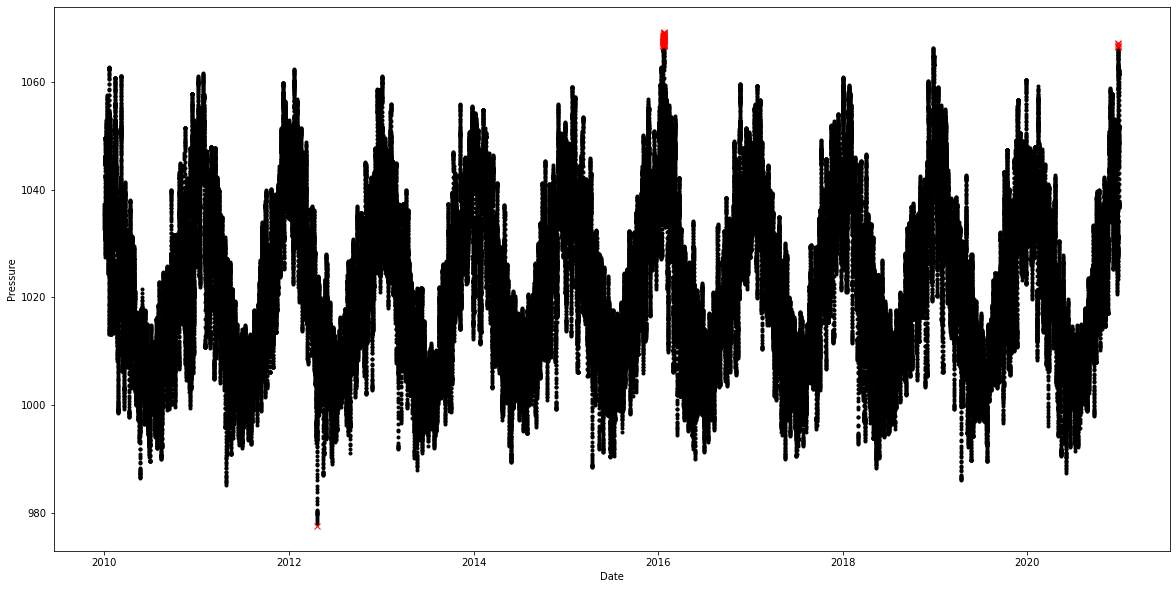

In [29]:
plt.plot(no_outlier['Timestamp'], no_outlier['Pressure'],".", color='black')
plt.plot(outlier['Timestamp'], outlier['Pressure'],'x', color='red')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

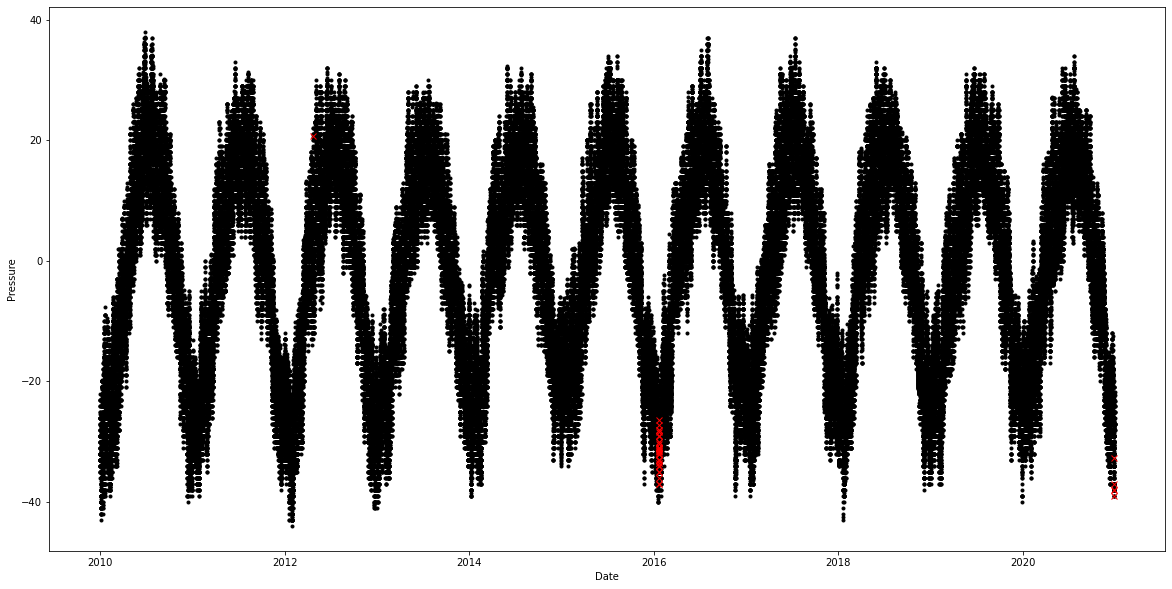

In [30]:
plt.plot(no_outlier['Timestamp'], no_outlier['Temperature'],".", color='black')
plt.plot(outlier['Timestamp'], outlier['Temperature'], "x", color='red')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

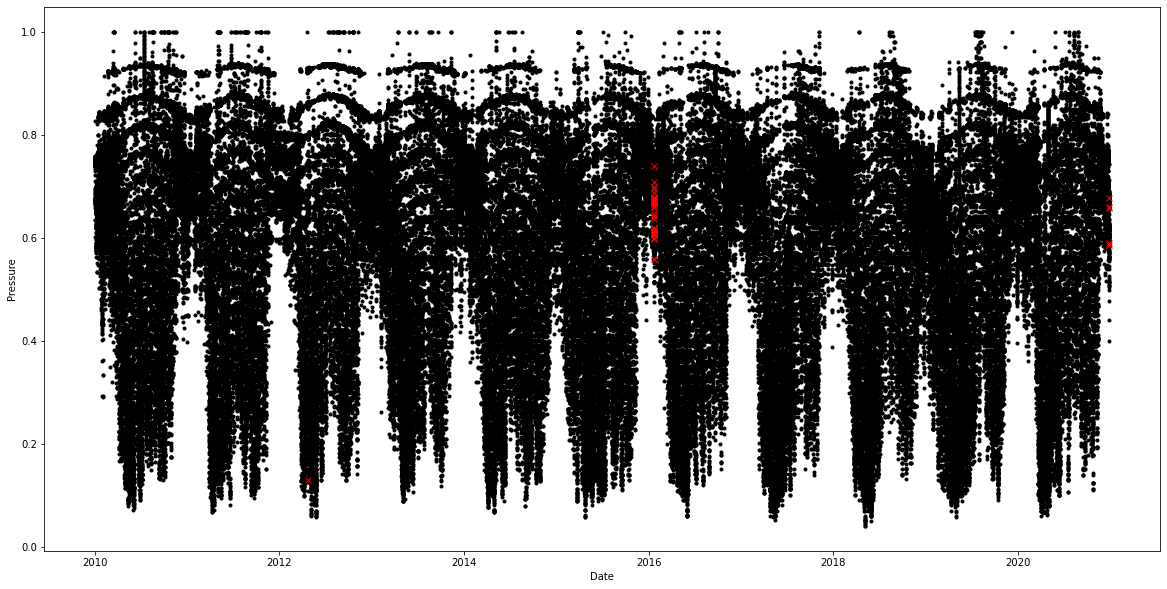

In [31]:
plt.plot(no_outlier['Timestamp'], no_outlier['Humidity'],'.', color='black')
plt.plot(outlier['Timestamp'], outlier['Humidity'],'x', color='red')
plt.xlabel('Date')
plt.ylabel('Pressure')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## **Deep Learning Binary Classification**

In [33]:
# Deep learning ашиглах тул өгөгдлийн олон баганатай болгож багана бүрийн мөрийн Z_score - ийг 
# feature болгож өгнө.


data = pd.DataFrame()
data = merged
data['humid_zscore'] = ( data.Humidity - data.Humidity.mean() ) / data.Humidity.std()
data['tempr_zscore'] = ( data.Temperature - data.Temperature.mean() ) / data.Temperature.std()
data['press_zscore'] = ( data.Pressure - data.Pressure.mean() ) / data.Pressure.std()
data = data[['Humidity','humid_zscore','Temperature','tempr_zscore','Pressure','press_zscore','outlier']]

In [36]:
data

,Humidity,humid_zscore,Temperature,tempr_zscore,Pressure,press_zscore,outlier
0,0.742,0.682175,-33.0,-1.891018,1037.400000,1.030914,0.0
1,0.742,0.682175,-33.0,-1.891018,1037.033333,1.006127,0.0
2,0.668,0.334287,-34.0,-1.950481,1036.666667,0.981339,0.0
3,0.742,0.682175,-33.0,-1.891018,1036.300000,0.956552,0.0
4,0.673,0.357793,-32.0,-1.831554,1035.933333,0.931765,0.0
...,...,...,...,...,...,...,...
192713,0.688,0.428310,-26.0,-1.474775,1037.500000,1.037674,0.0
192714,0.686,0.418908,-27.0,-1.534238,1037.350000,1.027534,0.0
192715,0.623,0.122733,-27.0,-1.534238,1037.200000,1.017394,0.0
192716,0.683,0.404804,-28.0,-1.593701,1037.050000,1.007253,0.0


## **Neural Network**

In [37]:
# for the operating system operations e.g., creating a folder.
import os

# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Print tensorfow (TF) version. Make sure you have at least tensorflow 2.1.0
print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.8.2


In [38]:
# import the dataset.
# from tensorflow.keras.datasets import boston_housing

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [39]:
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [40]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)


# uncomment the following line to use a GPU (Graphical Processing Unit) 
#if you have it available at your machine. This unit will make your code run faster.
tf.config.experimental.list_physical_devices('GPU')  


[]

In [41]:
data.head()

,Humidity,humid_zscore,Temperature,tempr_zscore,Pressure,press_zscore,outlier
0,0.742,0.682175,-33.0,-1.891018,1037.400000,1.030914,0.0
1,0.742,0.682175,-33.0,-1.891018,1037.033333,1.006127,0.0
2,0.668,0.334287,-34.0,-1.950481,1036.666667,0.981339,0.0
3,0.742,0.682175,-33.0,-1.891018,1036.300000,0.956552,0.0
4,0.673,0.357793,-32.0,-1.831554,1035.933333,0.931765,0.0


In [43]:
print(f'Number of rows/examples and columns in the dataset: {data.shape}')

Number of rows/examples and columns in the dataset: (192718, 7)


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192718 entries, 0 to 192717
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Humidity      192718 non-null  float64
 1   humid_zscore  192718 non-null  float64
 2   Temperature   192718 non-null  float64
 3   tempr_zscore  192718 non-null  float64
 4   Pressure      192718 non-null  float64
 5   press_zscore  192718 non-null  float64
 6   outlier       192718 non-null  float64
dtypes: float64(7)
memory usage: 10.3 MB


In [46]:
data.isna().sum()

Humidity        0
humid_zscore    0
Temperature     0
tempr_zscore    0
Pressure        0
press_zscore    0
outlier         0
dtype: int64

In [48]:
# slice the data set and keep last n rows of the dataset
n = 20
temp_ds = data[:n]
temp_ds.shape

(20, 7)

### Sample the dataset randomly and return fraction

In [49]:
# all_ds[10:]
# all_ds.sample(frac=1) # this will shuffle all of the dataset and randomly re-organize the rows.

data = data.sample(frac=1) # This will randomly shuffle the rows to make sure the data is not sorted. (if the data is sorted then we may end up with test dataset from one or two classes only)
# all_ds_90pct = all_ds.sample(frac=0.9) # randomly sample the dataset and keep 90% of the rows.
# all_ds_90pct.shape

## Split the dataset train/test splits.

In [51]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(data, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(115630, 7)
(77088, 7)


In [52]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(38544, 7)
(38544, 7)


In [53]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Train dataset      : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Train dataset      : (115630, 7)
 Test dataset       : (38544, 7)
 Validation dataset : (38544, 7)


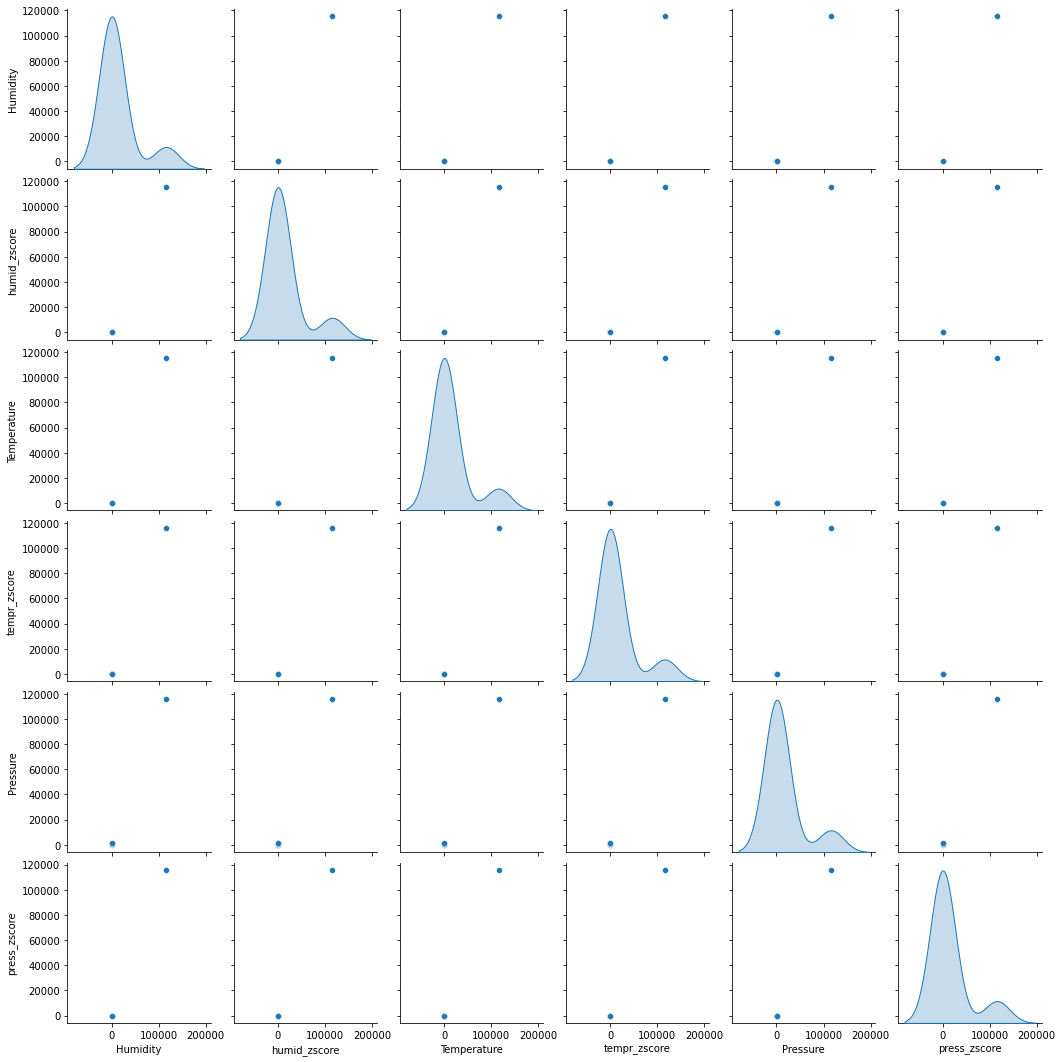

In [55]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("outlier")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [57]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("outlier")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Humidity,115630.0,0.597103,0.212516,0.040000,0.440000,0.657000,0.761000,1.000000
humid_zscore,115630.0,0.000985,0.999080,-2.618061,-0.737585,0.282574,0.771497,1.895082
Temperature,115630.0,-1.180595,16.823625,-44.000000,-15.500000,0.900000,13.000000,38.000000
tempr_zscore,115630.0,0.001067,1.000387,-2.545113,-0.850411,0.124786,0.844291,2.330872
Pressure,115630.0,1022.134478,14.811745,977.500000,1010.100000,1020.733333,1033.300000,1069.116667
press_zscore,115630.0,-0.001064,1.001301,-3.018437,-0.814616,-0.095783,0.753746,3.175019


### **Outlier = Variable ( 1 : outlier, 0 : normal )**

In [58]:
train_labels = train_dataset.pop('outlier')
test_labels = test_dataset.pop('outlier')
valid_labels = valid_dataset.pop('outlier')

### Data Normalization/Scaling

In [59]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [60]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape} ')
print(f'Test Labels  : {test_labels.shape} ')
print(f'Test Labels  : {valid_labels.shape} ')

Train/Test/Validate splits: 
Train    : (115630, 6) 
Test     : (38544, 6) 
Validate : (38544, 6) 
Train/Test/Validate labels: 
Train Labels : (115630,) 
Test Labels  : (38544,) 
Test Labels  : (38544,) 


In [62]:
train_labels.sum()
# Outliers in training dataset

27.0

In [63]:
test_labels.sum()
# Outliers in test dataset

9.0

In [65]:
valid_labels.sum()
# Outliers in validation dataset

12.0

In [66]:
# show a sample of the data after normalized
normed_train_data.head(10)

,Humidity,humid_zscore,Temperature,tempr_zscore,Pressure,press_zscore
143628,0.559474,0.559474,-0.761988,-0.761988,0.831470,0.831470
105058,0.822983,0.822983,-0.999749,-0.999749,0.933866,0.933866
170606,0.244204,0.244204,0.307936,0.307936,-0.621206,-0.621206
101545,-1.398023,-1.398023,0.307936,0.307936,-0.252129,-0.252129
82571,-0.645139,-0.645139,0.605137,0.605137,-0.571696,-0.571696
37879,0.752400,0.752400,-1.475271,-1.475271,0.933866,0.933866
103720,0.295965,0.295965,-0.702548,-0.702548,1.176917,1.176917
66041,-0.301636,-0.301636,0.605137,0.605137,-1.082552,-1.082552
20029,0.888860,0.888860,-0.524227,-0.524227,-0.650462,-0.650462
764,0.564179,0.564179,-0.889785,-0.889785,0.357747,0.357747


### **Build Neural Network**

In [67]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,841
Trainable params: 11,841
Non-trainable params: 0
_________________________________________________________________


2022-08-24 00:25:19.139210: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-24 00:25:19.140650: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### **Training the model above**

In [69]:
%%time

# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(32, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
#     model.add(Dense(128,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model


EPOCHS = 100
batch_size = 16 # 6 iteration

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )

Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                224       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7226/7226 [==============================] - 21s 3ms/step - loss: 0.5128 - accuracy: 0.9802 - val_loss: 0.3677 - val_accuracy: 0.9997
Epoch 2/100
7226/7226 [==============================] - 23s 3ms/step - loss: 0.2853 - accuracy: 0.9998 - val_loss: 0.2208 - val_accuracy: 0.9997
Epoch 3/100
7226/7226 [==============================] - 23s 3ms/step - loss: 0.1797 - accuracy: 0.9998 - val_loss: 0.1464 - v

Epoch 52/100
7226/7226 [==============================] - 16s 2ms/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 0.0051 - val_accuracy: 0.9997
Epoch 53/100
7226/7226 [==============================] - 16s 2ms/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.0051 - val_accuracy: 0.9997
Epoch 54/100
7226/7226 [==============================] - 17s 2ms/step - loss: 0.0046 - accuracy: 0.9998 - val_loss: 0.0050 - val_accuracy: 0.9997
Epoch 55/100
7226/7226 [==============================] - 16s 2ms/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 0.0049 - val_accuracy: 0.9997
Epoch 56/100
7226/7226 [==============================] - 17s 2ms/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 0.0048 - val_accuracy: 0.9997
Epoch 57/100
7226/7226 [==============================] - 16s 2ms/step - loss: 0.0044 - accuracy: 0.9998 - val_loss: 0.0048 - val_accuracy: 0.9997
Epoch 58/100
7226/7226 [==============================] - 20s 3ms/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0

In [72]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [73]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.002987,0.999775,0.003450,0.999689,95
96,0.003065,0.999758,0.003431,0.999689,96
97,0.002998,0.999766,0.003413,0.999689,97
98,0.002980,0.999766,0.003396,0.999689,98
99,0.002962,0.999766,0.003378,0.999689,99


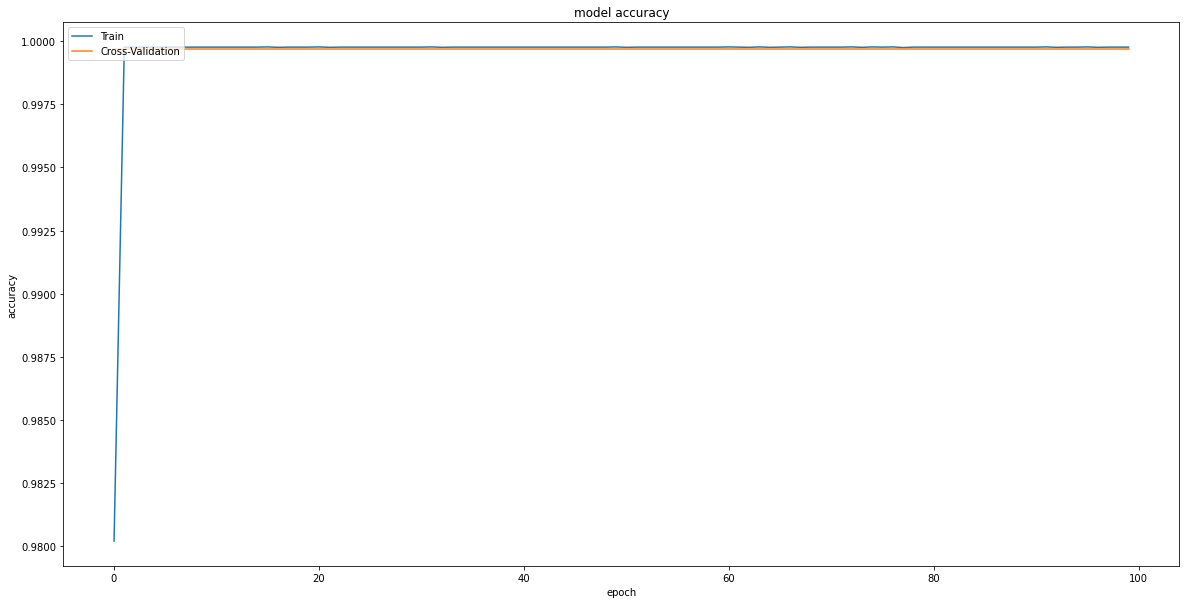

In [75]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

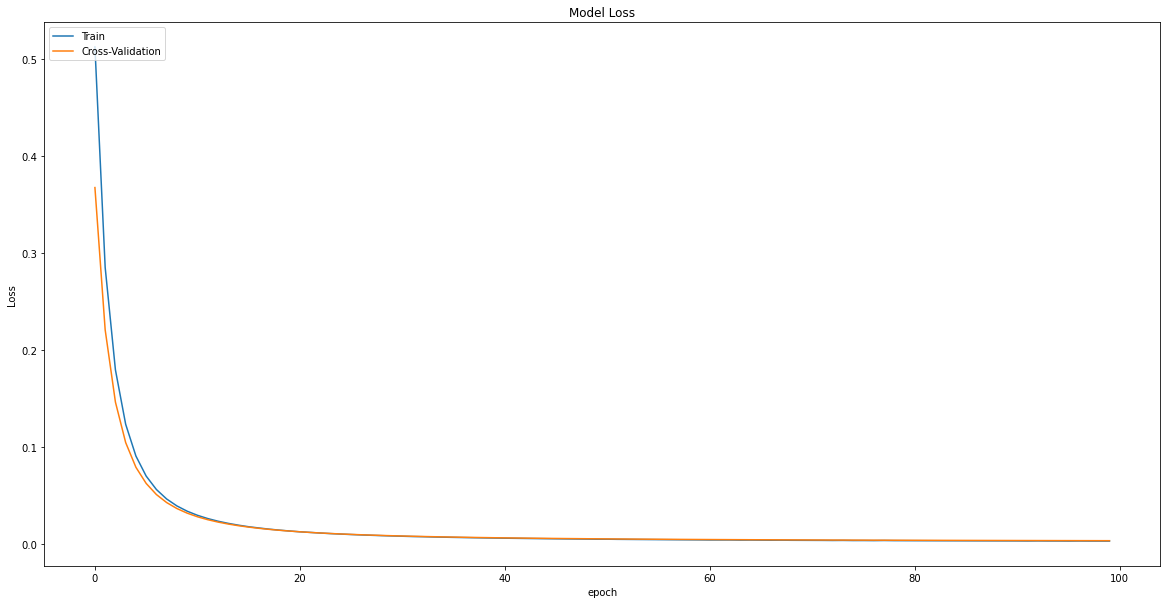

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [77]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
3614/3614 [==============================] - 10s 3ms/step - loss: 0.0030 - accuracy: 0.9998
Accuracy   :  1.00 


In [78]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
1205/1205 - 2s - loss: 0.0034 - accuracy: 0.9997 - 2s/epoch - 2ms/step
Accuracy   :  1.00 


In [79]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Test Split: 
1205/1205 - 3s - loss: 0.0029 - accuracy: 0.9998 - 3s/epoch - 3ms/step
Accuracy   :  1.00 


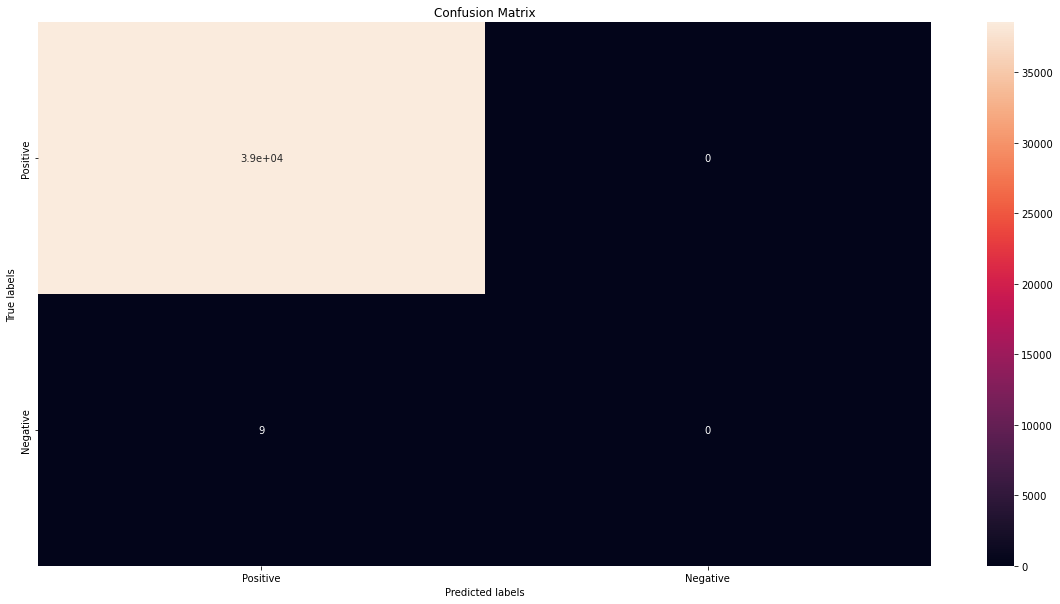

In [80]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = model.predict(normed_test_data)

predict_results = (predict_results > 0.5)

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);